In [1]:
from pitch import Pitch
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

In [2]:
# get dataframes for player and the ball
df_ball = pd.DataFrame({'frame':[1,2],'position_x':[50,100],'position_y':[-2000,-1950]})
df_player = pd.DataFrame({'frame':[1,1,1,1,2,2,2,2],'team_id':[1,1,2,2,1,1,2,2],
                          'position_x':[-1000,-1500,2000,2500,-950,-1450,2050,2550],
                          'position_y':[-1000,0,-2000,2000,-950,50,-1950,2050]})

In [3]:
# split player dataframe so teams are seperated - this makes it easier to color the markers
df_player1 = df_player.loc[df_player.team_id==1,['frame','position_x','position_y']].copy()
df_player2 = df_player.loc[df_player.team_id==2,['frame','position_x','position_y']].copy()

In [4]:
df_ball

,frame,position_x,position_y
0,1,50,-2000
1,2,100,-1950


In [5]:
df_player1

,frame,position_x,position_y
0,1,-1000,-1000
1,1,-1500,0
4,2,-950,-950
5,2,-1450,50


In [6]:
df_player2

,frame,position_x,position_y
2,1,2000,-2000
3,1,2500,2000
6,2,2050,-1950
7,2,2550,2050


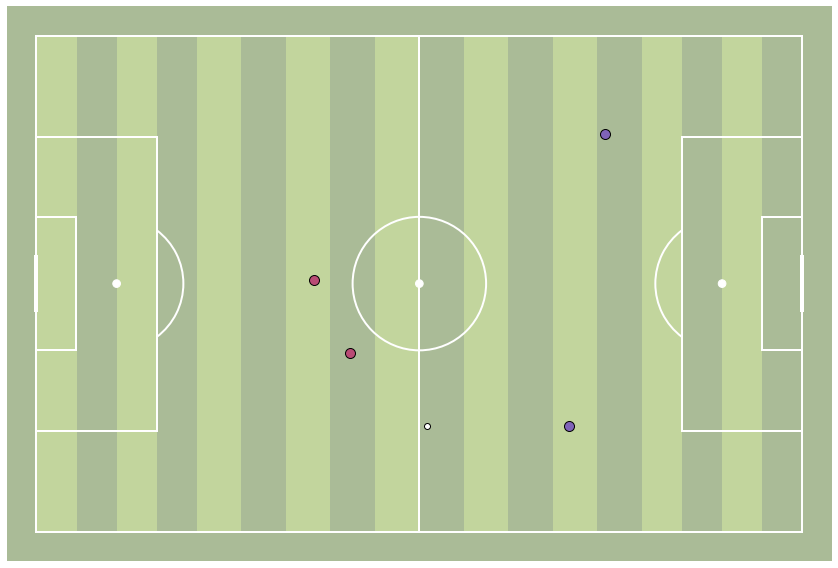

In [7]:
# First set up the figure, the axis, and the plot elements we want to animate
pitch = Pitch(pitch_type='tracab',orientation='horizontal',view='full',layout=(1,1),figsize=(12,8),
              pitch_width=68,pitch_length=105,stripe=True,goal_type='line',axis=False,label=True)
fig, ax = pitch.draw()
ball, = ax.plot([], [], 'ko', ms=6,markerfacecolor='w',zorder=3)
player_1, = ax.plot([], [], 'ko', ms=10,markerfacecolor='#b94b75') #red/maroon
player_2, = ax.plot([], [], 'ko', ms=10,markerfacecolor='#7f63b8') #purple
# initialization function: plot the background of each frame
def init():
    ball.set_data([], [])
    player_1.set_data([], [])
    player_2.set_data([], [])
    return ball,player_1,player_2
# animation function of dataframes' list
def animate(i):
    # set the ball data with the x and y positions for the ith frame
    ball.set_data(df_ball.iloc[i,1], df_ball.iloc[i,2])
    # get the frame id for the ith frame
    frame = df_ball.iloc[i,0]
    # set the player data using the frame id
    player_1.set_data(df_player1.loc[df_player1.frame==frame,'position_x'],
                      df_player1.loc[df_player1.frame==frame,'position_y'])
    player_2.set_data(df_player2.loc[df_player2.frame==frame,'position_x'],
                      df_player2.loc[df_player2.frame==frame,'position_y']) 
    return ball, player_1, player_2
# call the animator, animate every 300 ms
# note that its hard to get the ffmpeg requirements right. I installed from conda-forge: see the conda.yml file
anim = animation.FuncAnimation(fig, animate, frames=len(df_ball), init_func=init, interval=50, blit=True)
anim.save('demo.mp4',dpi=300, fps=25,extra_args=['-vcodec', 'libx264'])